In [196]:
#Import Libraries
#----------------
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import time,re
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,roc_curve
from sklearn.linear_model import LogisticRegression

%matplotlib inline
warnings.filterwarnings('ignore')

In [183]:
#Mounting the Google Drive to the Colab
from google.colab import drive
drive.mount('/content/gdrive')

# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
%mkdir -p /root/AnalyticsVidhya
!ln -s /content/gdrive/My\ Drive/AnalyticsVidhya/2_ML_in_Agriculture/ /root/AnalyticsVidhya

#Navigate to the Directory
%cd /root/AnalyticsVidhya/2_ML_in_Agriculture/
%ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
ln: failed to create symbolic link '/root/AnalyticsVidhya/2_ML_in_Agriculture': File exists
/content/gdrive/My Drive/AnalyticsVidhya/2_ML_in_Agriculture
Exercise.ipynb                 submission_1595768160.csv
Sample.h5                      submission_1595768380.csv
sample_submission_O1oDc4H.csv  submission_1595768989.csv
submission_1595688300.csv      submission_1595771686.csv
submission_1595688450.csv      submission_1595771720.csv
submission_1595738330.csv      submission_1595773398.csv
submission_1595738401.csv      submission_1595773762.csv
submission_1595738751.csv      submission_1595776382.csv
submission_1595741308.csv      submission_1595777389.csv
submission_1595741743.csv      submission_1595777815.csv
submission_1595744653.csv      submission_1595778352.csv
submission_1595745329.csv      submission_1595778723.csv
submission_1595746138.csv      s

In [197]:
#Load Dataset
#------------
train=pd.read_csv('train_yaOffsB.csv')
test=pd.read_csv('test_pFkWwen.csv')

train_orig=train.copy()
test_orig=test.copy()

In [198]:
#Train Dataset Analysis
#----------------------
print("Train Shape : ",train.shape)
print("Test Shape : ",test.shape)
print()

print("Train Columns")
print("----- -------")
print(train.columns)
print()

print("Train Datatypes")
print("----- ---------")
print(train.dtypes)
print()

print("Train Details")
print("----- -------")
train.describe()


Train Shape :  (88858, 10)
Test Shape :  (59310, 9)

Train Columns
----- -------
Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

Train Datatypes
----- ---------
ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

Train Details
----- -------


,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


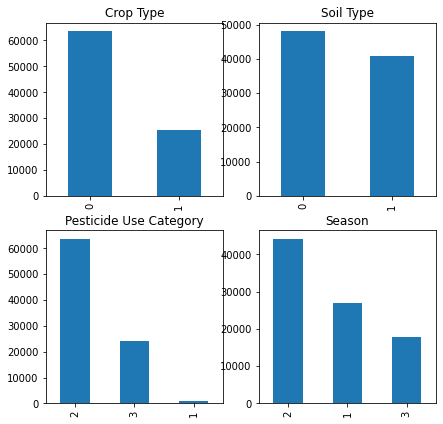

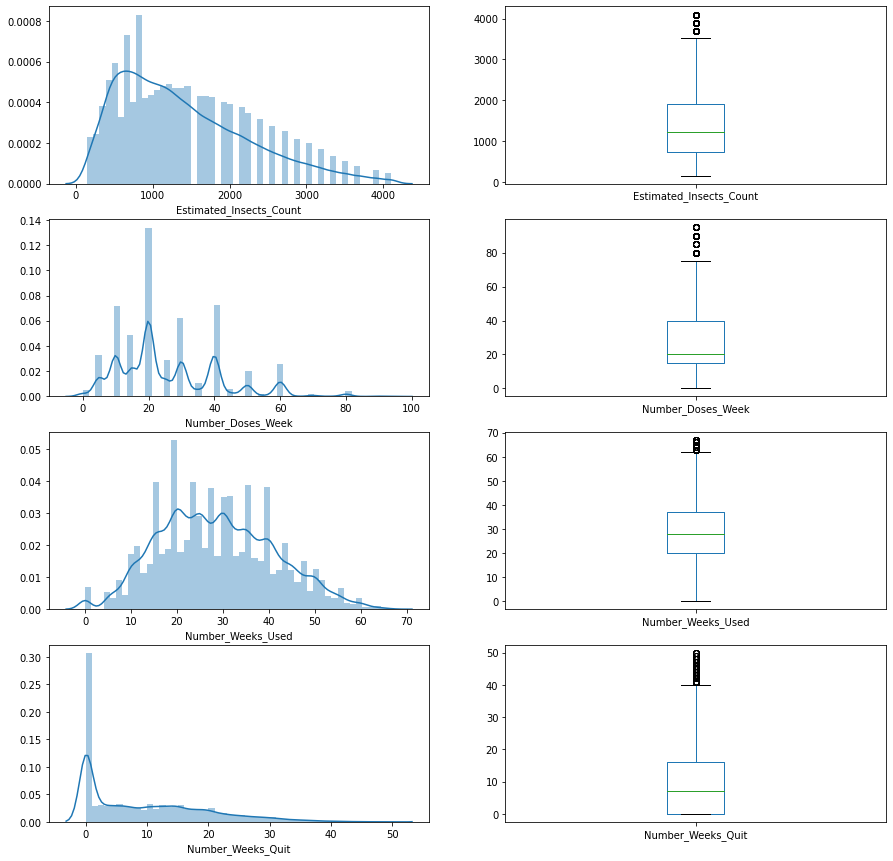

In [199]:
#Univariate Analysis
#---------- --------

#Categorical Variables
plt.figure(1)

plt.subplot(221)
train['Crop_Type'].value_counts().plot.bar(figsize=(7,7),title="Crop Type")

plt.subplot(222)
train['Soil_Type'].value_counts().plot.bar(figsize=(7,7),title="Soil Type")

plt.subplot(223)
train['Pesticide_Use_Category'].value_counts().plot.bar(figsize=(7,7),title="Pesticide Use Category")

plt.subplot(224)
train['Season'].value_counts().plot.bar(figsize=(7,7),title="Season")

#Numerical Variables
plt.figure(2)

plt.subplot(421)
sns.distplot(train['Estimated_Insects_Count'])
plt.subplot(422)
train['Estimated_Insects_Count'].plot.box(figsize=(15,15))

plt.subplot(423)
sns.distplot(train['Number_Doses_Week'])
plt.subplot(424)
train['Number_Doses_Week'].plot.box(figsize=(15,15))

plt.subplot(425)
sns.distplot(train['Number_Weeks_Used'])
plt.subplot(426)
train['Number_Weeks_Used'].plot.box(figsize=(15,15))

plt.subplot(427)
sns.distplot(train['Number_Weeks_Quit'])
plt.subplot(428)
train['Number_Weeks_Quit'].plot.box(figsize=(15,15))

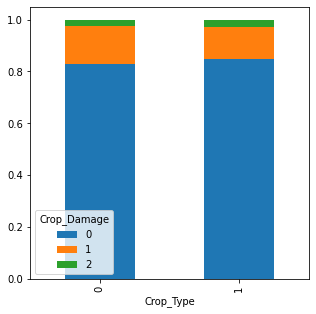

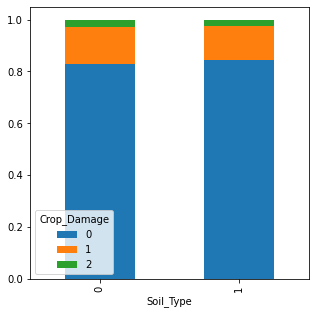

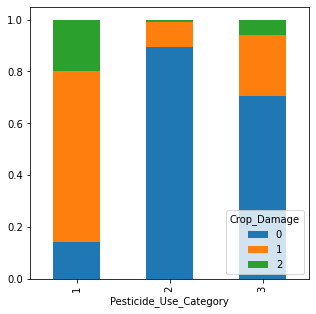

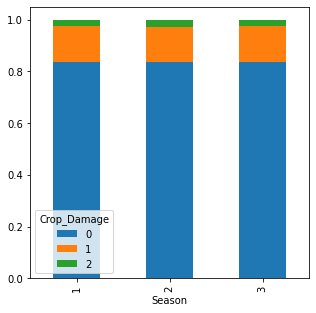

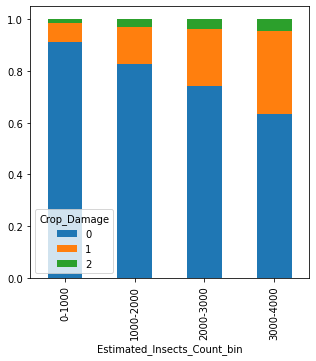

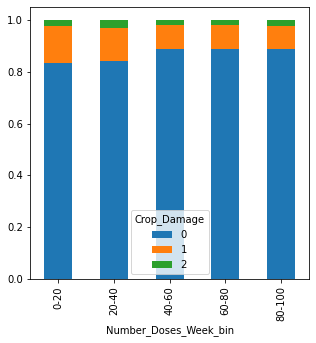

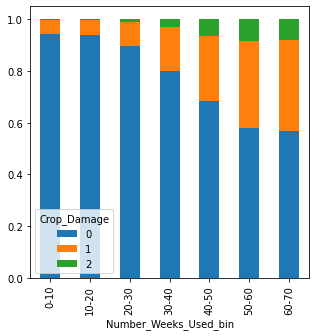

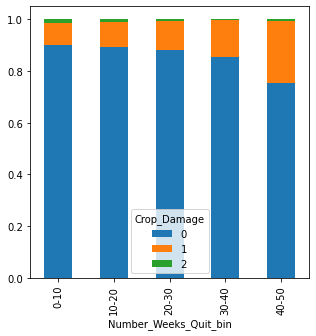

In [200]:
#Bivariate Analysis
#--------- --------

#Categorical Variables
Crop_Type=pd.crosstab(train['Crop_Type'],train['Crop_Damage'])
Crop_Type.div(Crop_Type.sum(1),axis=0).plot.bar(stacked=True,figsize=(5,5))

Soil_Type=pd.crosstab(train['Soil_Type'],train['Crop_Damage'])
Soil_Type.div(Soil_Type.sum(1),axis=0).plot.bar(stacked=True,figsize=(5,5))

Pesticide_Use_Category=pd.crosstab(train['Pesticide_Use_Category'],train['Crop_Damage'])
Pesticide_Use_Category.div(Pesticide_Use_Category.sum(1),axis=0).plot.bar(stacked=True,figsize=(5,5))

Season=pd.crosstab(train['Season'],train['Crop_Damage'])
Season.div(Season.sum(1),axis=0).plot.bar(stacked=True,figsize=(5,5))

#Numerical Variables
bins=[0,1000,2000,3000,4000] 
group=['0-1000','1000-2000','2000-3000', '3000-4000'] 
train['Estimated_Insects_Count_bin']=pd.cut(train['Estimated_Insects_Count'],bins=bins,labels=group)
Estimated_Insects_Count_bin=pd.crosstab(train['Estimated_Insects_Count_bin'],train['Crop_Damage'])
Estimated_Insects_Count_bin.div(Estimated_Insects_Count_bin.sum(1), axis=0).plot.bar(stacked=True,figsize=(5,5))

bins=[0,20,40,60,80,100] 
group=['0-20','20-40','40-60','60-80','80-100'] 
train['Number_Doses_Week_bin']=pd.cut(train['Number_Doses_Week'],bins=bins,labels=group)
Number_Doses_Week_bin=pd.crosstab(train['Number_Doses_Week_bin'],train['Crop_Damage'])
Number_Doses_Week_bin.div(Number_Doses_Week_bin.sum(1), axis=0).plot.bar(stacked=True,figsize=(5,5))

bins=[0,10,20,30,40,50,60,70] 
group=['0-10','10-20','20-30','30-40','40-50','50-60','60-70'] 
train['Number_Weeks_Used_bin']=pd.cut(train['Number_Weeks_Used'],bins=bins,labels=group)
Number_Weeks_Used_bin=pd.crosstab(train['Number_Weeks_Used_bin'],train['Crop_Damage'])
Number_Weeks_Used_bin.div(Number_Weeks_Used_bin.sum(1), axis=0).plot.bar(stacked=True,figsize=(5,5))

bins=[0,10,20,30,40,50] 
group=['0-10','10-20','20-30','30-40','40-50'] 
train['Number_Weeks_Quit_bin']=pd.cut(train['Number_Weeks_Quit'],bins=bins,labels=group)
Number_Weeks_Quit_bin=pd.crosstab(train['Number_Weeks_Quit_bin'],train['Crop_Damage'])
Number_Weeks_Quit_bin.div(Number_Weeks_Quit_bin.sum(1), axis=0).plot.bar(stacked=True,figsize=(5,5))


In [201]:
#Remove unnecessary bins
#------ ----------- ----
try:
    train=train.drop(['Estimated_Insects_Count_bin','Number_Doses_Week_bin','Number_Weeks_Quit_bin','Number_Weeks_Used_bin'],axis=1)
    print("Bin Columns are dropped")
except:
    print("Columns aren't existing")
print()
print("Present Columns:")
print(train.columns)   


Bin Columns are dropped

Present Columns:
Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')


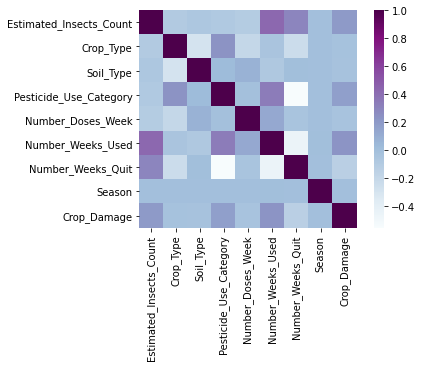

In [202]:
#Heatmap
#-------
matrix = train.corr() 
plt.subplots() 
sns.heatmap(matrix, square=True, cmap="BuPu");

In [203]:
#Missing Values Treatment in Train dataset
#------- ------ --------- -- ----- -------
train['Number_Weeks_Used'].fillna(train['Number_Weeks_Used'].mode()[0],inplace=True)
print(train.isnull().sum())

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64


In [204]:
#Missing Values Treatment in Test dataset
#------- ------ --------- -- ----- -------
test['Number_Weeks_Used'].fillna(test['Number_Weeks_Used'].mode()[0],inplace=True)
print(test.isnull().sum())

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64


In [205]:
#Remove ID
#---------
try:
    train=train.drop('ID',axis=1) 
    test=test.drop('ID',axis=1)
    print("ID Column is dropped")
except:
    print("Column isn't existing")
print()
print("Present Columns:")
print(train.columns) 

ID Column is dropped

Present Columns:
Index(['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')


In [206]:
#Update the Category Variables
#-----------------------------
X=train.drop('Crop_Damage',axis=1)
y=train.Crop_Damage
X['Crop_Type']=X['Crop_Type'].astype(object)
X['Soil_Type']=X['Soil_Type'].astype(object)
X['Pesticide_Use_Category']=X['Pesticide_Use_Category'].astype(object)
X['Season']=X['Season'].astype(object)
X=pd.get_dummies(X)

test['Crop_Type']=test['Crop_Type'].astype(object)
test['Soil_Type']=test['Soil_Type'].astype(object)
test['Pesticide_Use_Category']=test['Pesticide_Use_Category'].astype(object)
test['Season']=test['Season'].astype(object)
test=pd.get_dummies(test)

print("Train Shape : ",X.shape)
print("Test Shape : ",test.shape)
print()

print("Train Columns")
print("----- -------")
print(X.columns)
print()

print("Train Datatypes")
print("----- ---------")
print(X.dtypes)
print()

print("Test Columns")
print("----- -------")
print(test.columns)
print()

print("Test Datatypes")
print("----- ---------")
print(test.dtypes)
print()

print("Train Details")
print("----- -------")
X.describe()

Train Shape :  (88858, 14)
Test Shape :  (59310, 14)

Train Columns
----- -------
Index(['Estimated_Insects_Count', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Crop_Type_0', 'Crop_Type_1', 'Soil_Type_0',
       'Soil_Type_1', 'Pesticide_Use_Category_1', 'Pesticide_Use_Category_2',
       'Pesticide_Use_Category_3', 'Season_1', 'Season_2', 'Season_3'],
      dtype='object')

Train Datatypes
----- ---------
Estimated_Insects_Count       int64
Number_Doses_Week             int64
Number_Weeks_Used           float64
Number_Weeks_Quit             int64
Crop_Type_0                   uint8
Crop_Type_1                   uint8
Soil_Type_0                   uint8
Soil_Type_1                   uint8
Pesticide_Use_Category_1      uint8
Pesticide_Use_Category_2      uint8
Pesticide_Use_Category_3      uint8
Season_1                      uint8
Season_2                      uint8
Season_3                      uint8
dtype: object

Test Columns
----- -------
Index(['Estimated_

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Crop_Type_0,Crop_Type_1,Soil_Type_0,Soil_Type_1,Pesticide_Use_Category_1,Pesticide_Use_Category_2,Pesticide_Use_Category_3,Season_1,Season_2,Season_3
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,25.849952,27.750490,9.589986,0.715625,0.284375,0.541583,0.458417,0.009420,0.716975,0.273605,0.302753,0.497535,0.199712
std,849.048781,15.554428,12.032261,9.900631,0.451119,0.451119,0.498271,0.498271,0.096597,0.450471,0.445811,0.459452,0.499997,0.399786
min,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,731.000000,15.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1212.000000,20.000000,26.000000,7.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1898.000000,40.000000,36.000000,16.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,4097.000000,95.000000,67.000000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Train Dataset
----- -------
Insects Count Variable is updated with Log
Insects Count Feature Dropped

Test Dataset
---- -------
Insects Count Variable is updated with Log
Insects Count Feature Dropped



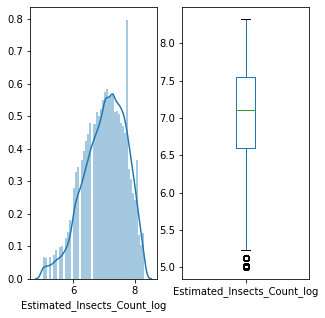

In [ ]:
#Feature Engineering
#------- -----------
print("Train Dataset")
print("----- -------")
try:
    X['Estimated_Insects_Count_log']=np.log(X['Estimated_Insects_Count'])
    print("Insects Count Variable is updated with Log")
    X=X.drop('Estimated_Insects_Count',axis=1)
    print("Insects Count Feature Dropped")
except:
    print("Log Feature of Insects Count already exists")
print()



print("Test Dataset")
print("---- -------")
try:
    test['Estimated_Insects_Count_log']=np.log(test['Estimated_Insects_Count'])
    print("Insects Count Variable is updated with Log")
    test=test.drop('Estimated_Insects_Count',axis=1)
    print("Insects Count Feature Dropped")
except:
    print("Log Feature of Insects Count already exists")
print()

#Univariate Analysis
plt.figure(1)

plt.subplot(121)
sns.distplot(X['Estimated_Insects_Count_log'])
plt.subplot(122)
X['Estimated_Insects_Count_log'].plot.box(figsize=(5,5))



In [ ]:
try:
    X['Number_Days_Used']=X['Number_Weeks_Used']*7
    X['Number_Days_Quit']=X['Number_Weeks_Quit']*7
    X=X.drop(['Number_Weeks_Used','Number_Weeks_Quit'],axis=1)
    print("Days are replaced with Weeks")
except:
    print("Days are already replaced with Weeks")
print()

try:
    test['Number_Days_Used']=test['Number_Weeks_Used']*7
    test['Number_Days_Quit']=test['Number_Weeks_Quit']*7
    test=test.drop(['Number_Weeks_Used','Number_Weeks_Quit'],axis=1)
    print("Days are replaced with Weeks")
except:
    print("Days are already replaced with Weeks")
print()


,Number_Doses_Week,Crop_Type_0,Crop_Type_1,Soil_Type_0,Soil_Type_1,Pesticide_Use_Category_1,Pesticide_Use_Category_2,Pesticide_Use_Category_3,Season_1,Season_2,Season_3,Estimated_Insects_Count_log,Number_Days_Used,Number_Days_Quit
88853,10,0,1,1,0,0,1,0,0,0,1,8.112827,84.0,308
88854,10,0,1,1,0,0,1,0,1,0,0,8.165079,140.0,266
88855,15,0,1,1,0,0,1,0,0,1,0,8.165079,280.0,56
88856,10,0,1,1,0,0,1,0,0,0,1,8.216628,175.0,126
88857,20,0,1,1,0,0,1,0,0,0,1,8.267449,259.0,49


In [207]:
print(X.columns)
print(X.shape)
print(test.columns)
print(test.shape)
try:
  X['Number_Doses_Week_P1']=X['Number_Doses_Week']*X['Pesticide_Use_Category_1']
  X['Number_Doses_Week_P2']=X['Number_Doses_Week']*X['Pesticide_Use_Category_2']
  X['Number_Doses_Week_P3']=X['Number_Doses_Week']*X['Pesticide_Use_Category_3']

  X['Number_Weeks_Used_P1']=X['Number_Weeks_Used']*X['Pesticide_Use_Category_1']
  X['Number_Weeks_Used_P2']=X['Number_Weeks_Used']*X['Pesticide_Use_Category_2']
  X['Number_Weeks_Used_P3']=X['Number_Weeks_Used']*X['Pesticide_Use_Category_3']

  X['Number_Weeks_Quit_P1']=X['Number_Weeks_Quit']*X['Pesticide_Use_Category_1']
  X['Number_Weeks_Quit_P2']=X['Number_Weeks_Quit']*X['Pesticide_Use_Category_2']
  X['Number_Weeks_Quit_P3']=X['Number_Weeks_Quit']*X['Pesticide_Use_Category_3']

  test['Number_Doses_Week_P1']=test['Number_Doses_Week']*test['Pesticide_Use_Category_1']
  test['Number_Doses_Week_P2']=test['Number_Doses_Week']*test['Pesticide_Use_Category_2']
  test['Number_Doses_Week_P3']=test['Number_Doses_Week']*test['Pesticide_Use_Category_3']

  test['Number_Weeks_Used_P1']=test['Number_Weeks_Used']*test['Pesticide_Use_Category_1']
  test['Number_Weeks_Used_P2']=test['Number_Weeks_Used']*test['Pesticide_Use_Category_2']
  test['Number_Weeks_Used_P3']=test['Number_Weeks_Used']*test['Pesticide_Use_Category_3']

  test['Number_Weeks_Quit_P1']=test['Number_Weeks_Quit']*test['Pesticide_Use_Category_1']
  test['Number_Weeks_Quit_P2']=test['Number_Weeks_Quit']*test['Pesticide_Use_Category_2']
  test['Number_Weeks_Quit_P3']=test['Number_Weeks_Quit']*test['Pesticide_Use_Category_3']
  print("Created")
except:
  print("Already Managed")

try:
  X=X.drop(['Number_Doses_Week', 'Number_Weeks_Used', 'Number_Weeks_Quit','Pesticide_Use_Category_1', 'Pesticide_Use_Category_2','Pesticide_Use_Category_3'],axis=1)
  test=test.drop(['Number_Doses_Week', 'Number_Weeks_Used', 'Number_Weeks_Quit','Pesticide_Use_Category_1', 'Pesticide_Use_Category_2','Pesticide_Use_Category_3'],axis=1)
  print("Dropped")
except:
  print("Already Managed")

try:
  X=X.drop(['Crop_Type_1','Soil_Type_1','Number_Doses_Week_P1','Number_Weeks_Quit_P1','Number_Weeks_Quit_P3'],axis=1)
  test=test.drop(['Crop_Type_1','Soil_Type_1','Number_Doses_Week_P1','Number_Weeks_Quit_P1','Number_Weeks_Quit_P3'],axis=1)
  print("Dropped")
except:
  print("Already Managed")

print(X.columns)
print(X.shape)
print(test.columns)
print(test.shape)

Index(['Estimated_Insects_Count', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Crop_Type_0', 'Crop_Type_1', 'Soil_Type_0',
       'Soil_Type_1', 'Pesticide_Use_Category_1', 'Pesticide_Use_Category_2',
       'Pesticide_Use_Category_3', 'Season_1', 'Season_2', 'Season_3'],
      dtype='object')
(88858, 14)
Index(['Estimated_Insects_Count', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Crop_Type_0', 'Crop_Type_1', 'Soil_Type_0',
       'Soil_Type_1', 'Pesticide_Use_Category_1', 'Pesticide_Use_Category_2',
       'Pesticide_Use_Category_3', 'Season_1', 'Season_2', 'Season_3'],
      dtype='object')
(59310, 14)
Created
Dropped
Dropped
Index(['Estimated_Insects_Count', 'Crop_Type_0', 'Soil_Type_0', 'Season_1',
       'Season_2', 'Season_3', 'Number_Doses_Week_P2', 'Number_Doses_Week_P3',
       'Number_Weeks_Used_P1', 'Number_Weeks_Used_P2', 'Number_Weeks_Used_P3',
       'Number_Weeks_Quit_P2'],
      dtype='object')
(88858, 12)
Index(['Es

In [208]:
X.tail()

,Estimated_Insects_Count,Crop_Type_0,Soil_Type_0,Season_1,Season_2,Season_3,Number_Doses_Week_P2,Number_Doses_Week_P3,Number_Weeks_Used_P1,Number_Weeks_Used_P2,Number_Weeks_Used_P3,Number_Weeks_Quit_P2
88853,3337,0,1,0,0,1,10,0,0.0,12.0,0.0,44
88854,3516,0,1,1,0,0,10,0,0.0,20.0,0.0,38
88855,3516,0,1,0,1,0,15,0,0.0,40.0,0.0,8
88856,3702,0,1,0,0,1,10,0,0.0,25.0,0.0,18
88857,3895,0,1,0,0,1,20,0,0.0,37.0,0.0,7


In [ ]:
#Simple Logistic Regression model using train-test split
#------ -------- ---------- ----- ----- ---------- -----
X_train,X_cv,y_train,y_cv=train_test_split(X,y,test_size=0.25)

print("Creating Model......")
model=LogisticRegression()
model.fit(X_train,y_train)
print("Simple Logistic Regression model created")
print()

#Prediction in Validation Dataset
#---------- -- ---------- ------- 
pred_cv=model.predict(X_cv)
print("Prediction in Validation Data Done successfully")
print("Validation Accuracy : ", accuracy_score(y_cv,pred_cv))
print()

#Prediction in Test Dataset
#---------- -- ---- ------- 
pred_test=model.predict(test)
print("Prediction in Test Data Done successfully")

Creating Model......
Simple Logistic Regression model created

Prediction in Validation Data Done successfully
Validation Accuracy :  0.8287193337834796

Prediction in Test Data Done successfully


In [ ]:
#Simple Logistic Regression model using Stratified KFold
#------ -------- ---------- ----- ----- ---------- -----
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
print("Creating Model......")
for train_index,cv_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    X_train,X_cv = X.loc[train_index],X.loc[cv_index]
    y_train,y_cv = y[train_index],y[cv_index]  
    model=LogisticRegression(random_state=1)
    model.fit(X_train,y_train)
    pred_cv=model.predict(X_cv)
    print("Validation Accuracy : ", accuracy_score(y_cv,pred_cv))
    print()
    i+=1

#Prediction in Test Dataset
#---------- -- ---- ------- 
pred_test=model.predict(test)
print("Prediction in Test Data Done successfully")

Creating Model......

1 of kfold 5
Validation Accuracy :  0.8337272113436867


2 of kfold 5
Validation Accuracy :  0.8328269187485933


3 of kfold 5
Validation Accuracy :  0.8319266261534999


4 of kfold 5
Validation Accuracy :  0.8261774801643127


5 of kfold 5
Validation Accuracy :  0.8309042822576107

Prediction in Test Data Done successfully


In [ ]:
#Decision Tree Classifier model using Stratified KFold
#-------- ---- ---------- ----- ----- ---------- -----
from sklearn import tree
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
print("Creating Model......")
for train_index,cv_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    X_train,X_cv = X.loc[train_index],X.loc[cv_index]
    y_train,y_cv = y[train_index],y[cv_index]  
    model=tree.DecisionTreeClassifier(random_state=1)
    model.fit(X_train,y_train)
    pred_cv=model.predict(X_cv)
    print("Validation Accuracy : ", accuracy_score(y_cv,pred_cv))
    print()
    i+=1
    
#Prediction in Test Dataset
#---------- -- ---- ------- 
pred_test=model.predict(test)
print("Prediction in Test Data Done successfully")

Creating Model......

1 of kfold 5
Validation Accuracy :  0.7585527796533873


2 of kfold 5
Validation Accuracy :  0.7487058293945532


3 of kfold 5
Validation Accuracy :  0.7439792932703129


4 of kfold 5
Validation Accuracy :  0.7491981317877441


5 of kfold 5
Validation Accuracy :  0.7565696921951494

Prediction in Test Data Done successfully


In [ ]:
#Random Forest Classifier model using Stratified KFold
#------ ------ ---------- ----- ----- ---------- -----
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
print("Creating Model......")
for train_index,cv_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    X_train,X_cv = X.loc[train_index],X.loc[cv_index]
    y_train,y_cv = y[train_index],y[cv_index]  
    model=RandomForestClassifier(random_state=1,max_depth=10)
    model.fit(X_train,y_train)
    pred_cv=model.predict(X_cv)
    print("Validation Accuracy : ", accuracy_score(y_cv,pred_cv))
    print()
    i+=1
    
#Prediction in Test Dataset
#---------- -- ---- ------- 
pred_test=model.predict(test)
print("Prediction in Test Data Done successfully")

Creating Model......

1 of kfold 5
Validation Accuracy :  0.8421111861354941


2 of kfold 5
Validation Accuracy :  0.8425050641458474


3 of kfold 5
Validation Accuracy :  0.842955210443394


4 of kfold 5
Validation Accuracy :  0.8414270440605481


5 of kfold 5
Validation Accuracy :  0.8420460300489562

Prediction in Test Data Done successfully


In [ ]:
#Random Forest Classifier model using GridSearch & Stratified KFold
#------ ------ ---------- ----- ----- ---------- - ---------- -----
paramgrid = {'max_depth': list(range(1,20,2)),
             'n_estimators': list(range(1,200,20)) }

grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

X_train,X_cv,y_train,y_cv = train_test_split(X,y,test_size=0.25)

grid_search.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

Grid Search Best Parameters:

Creating Model......

1 of kfold 5
Validation Accuracy :  0.841604771550754


2 of kfold 5
Validation Accuracy :  0.8411546252532073


3 of kfold 5
Validation Accuracy :  0.8422237227098807


4 of kfold 5
Validation Accuracy :  0.8413707726070564


5 of kfold 5
Validation Accuracy :  0.8424399302233977

Prediction in Test Data Done successfully


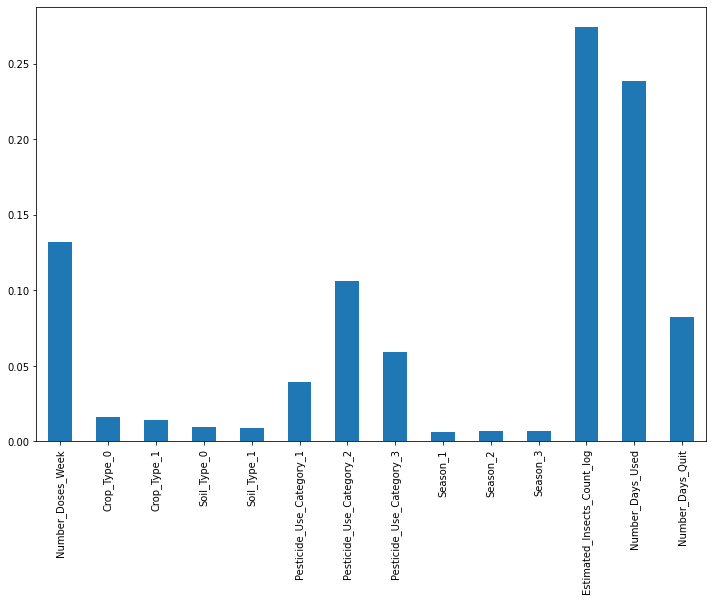

In [ ]:
#Random Forest Best Estimator
#------ ------ ---- ---------
print("Grid Search Best Parameters:")
#print(grid_search.best_estimator_)
print()
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
print("Creating Model......")
for train_index,cv_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    X_train,X_cv = X.loc[train_index],X.loc[cv_index]
    y_train,y_cv = y[train_index],y[cv_index]  
    model=RandomForestClassifier(random_state=1,max_depth=11,n_estimators=81)
    model.fit(X_train,y_train)
    pred_cv=model.predict(X_cv)
    print("Validation Accuracy : ", accuracy_score(y_cv,pred_cv))
    print()
    i+=1

#Prediction in Test Dataset
#---------- -- ---- ------- 
pred_test=model.predict(test)
print("Prediction in Test Data Done successfully")

#Importance of the variables
#---------- -- --- ---------
feature_importances=pd.Series(model.feature_importances_,index=X.columns)
feature_importances.plot.bar(figsize=(12,8))

In [ ]:
#ANN model using Stratified KFold
#--- ----- ----- ---------- -----
from keras.models import Sequential
from keras.layers import Dense,Dropout
from sklearn.preprocessing import OneHotEncoder

#One-Hot Encoding of Target Variable
y=train_orig.Crop_Damage
y=np.array(y).reshape(-1,1)
onehotencoder = OneHotEncoder()
y = onehotencoder.fit_transform(y).toarray()

HIDDEN_UNITS=128
INPUT_DIM=14
NO_CLASSES=3
BATCH_SIZE=64
EPOCHS=10

model=Sequential()
model.add(Dense(units=HIDDEN_UNITS,activation='relu',kernel_initializer='glorot_uniform',input_dim=INPUT_DIM))
model.add(Dropout(0.2))
model.add(Dense(units=HIDDEN_UNITS,activation='relu',kernel_initializer='glorot_uniform'))
model.add(Dropout(0.2))
model.add(Dense(units=3,activation='softmax'))
model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')


In [ ]:
print(model.summary())
model.fit(X,y,validation_split=0.25,batch_size=BATCH_SIZE,epochs=EPOCHS)
model.save_weights('Sample.h5')
X.shape

pred_test=model.predict(test)
pred_result=np.argmax(pred_test,axis=1)

submission=pd.read_csv('sample_submission_O1oDc4H.csv')
submission['Crop_Damage']=pred_result
submission['ID']=test_orig['ID']
timestamp=(re.findall('[0-9]+',str(time.time())))[0]
filename='submission_'+str(timestamp)+'.csv'

pd.DataFrame(submission,columns=['ID','Crop_Damage']).to_csv(filename,index=False)
print("File named {} stored successfully".format(filename))

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 128)               1920      
_________________________________________________________________
dropout_21 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_22 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 3)                 387       
Total params: 18,819
Trainable params: 18,819
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
1042/1042 [==============================] - 3s 3ms/step - loss: 0.8155 - accuracy: 0.8171 - val_lo

(88858, 14)

Creating Model......

1 of kfold 5
Validation Accuracy :  0.8436866981769074


2 of kfold 5
Validation Accuracy :  0.8413234301147873


3 of kfold 5
Validation Accuracy :  0.8431240153049742


4 of kfold 5
Validation Accuracy :  0.8417646727814979


5 of kfold 5
Validation Accuracy :  0.8440718023746553

Prediction in Test Data Done successfully


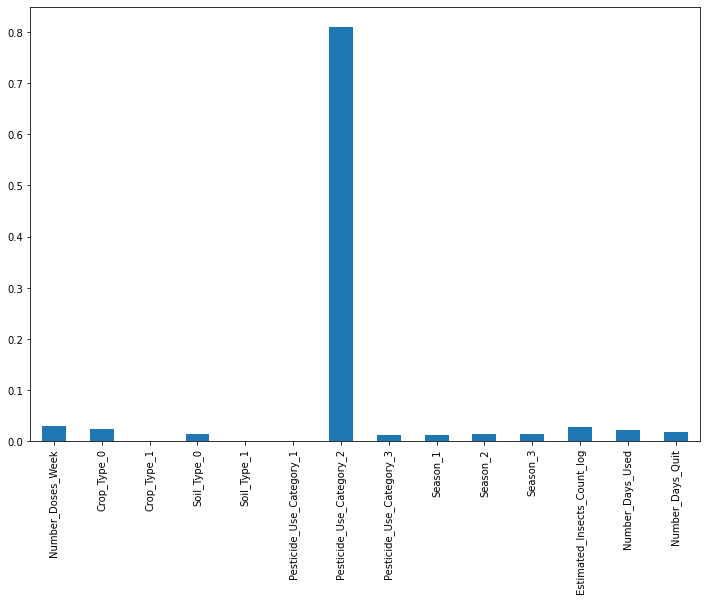

In [ ]:
#XGBoost Classifier model using Stratified KFold
#------- ---------- ----- ----- ---------- -----
from xgboost import XGBClassifier

i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
print("Creating Model......")
for train_index,cv_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    X_train,X_cv = X.loc[train_index],X.loc[cv_index]
    y_train,y_cv = y[train_index],y[cv_index]  
    #model=XGBClassifier(random_state=1,max_depth=4,n_estimators=50)
    model=XGBClassifier(random_state=1,max_depth=11,n_estimators=81)
    model.fit(X_train,y_train)
    pred_cv=model.predict(X_cv)
    print("Validation Accuracy : ", accuracy_score(y_cv,pred_cv))
    print()
    i+=1
    
#Prediction in Test Dataset
#---------- -- ---- ------- 
pred_test=model.predict(test)
print("Prediction in Test Data Done successfully")

#Importance of the variables
#---------- -- --- ---------
feature_importances=pd.Series(model.feature_importances_,index=X.columns)
feature_importances.plot.bar(figsize=(12,8))

In [ ]:
#XG Boost Classifier model using GridSearch & Stratified KFold
#-------- ---------- ----- ----- ---------- - ---------- -----
from xgboost import XGBClassifier

paramgrid = {'max_depth': list(range(1,20,5)),
             'n_estimators': list(range(1,200,50)) }

grid_search=GridSearchCV(XGBClassifier(random_state=1),paramgrid)

X_train,X_cv,y_train,y_cv = train_test_split(X,y,test_size=0.25)

grid_search.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=1, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 6, 11, 16],
                         'n_estimators': [1, 51, 101, 151]},
             pre_dispatch='2*n_jobs', refit=True, return_tr

Grid Search Best Parameters:

Creating Model......

1 of kfold 4
Validation Accuracy :  0.845734863830745


2 of kfold 4
Validation Accuracy :  0.8476254782804411


3 of kfold 4
Validation Accuracy :  0.8462231025479428


4 of kfold 4
Validation Accuracy :  0.8483388853875934

Prediction in Test Data Done successfully


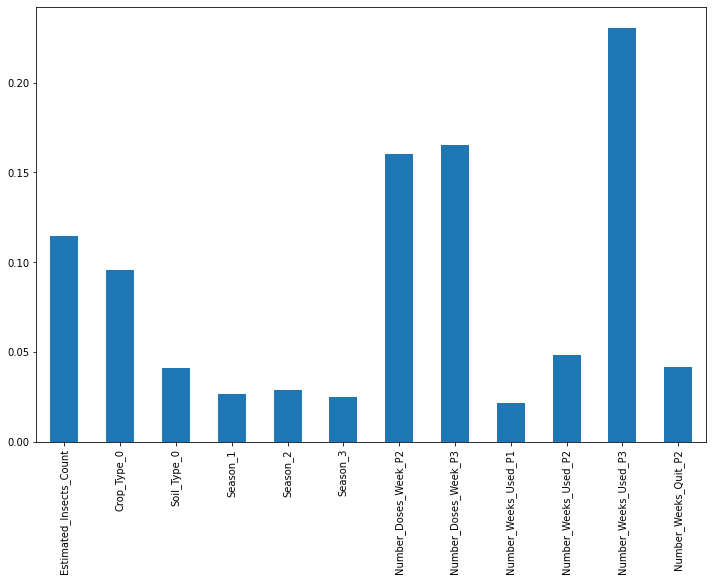

In [ ]:
#XG Boost Best Estimator
#-- ----- ---- ---------
print("Grid Search Best Parameters:")
#print(grid_search.best_estimator_)
print()
i=1
kf = StratifiedKFold(n_splits=4,random_state=1,shuffle=True)
print("Creating Model......")
for train_index,cv_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    X_train,X_cv = X.loc[train_index],X.loc[cv_index]
    y_train,y_cv = y[train_index],y[cv_index]  
    model=XGBClassifier(random_state=1,max_depth=6,n_estimators=151,objective='multi:softmax',num_class=3)
    model.fit(X_train,y_train)
    pred_cv=model.predict(X_cv)
    print("Validation Accuracy : ", accuracy_score(y_cv,pred_cv))
    print()
    i+=1

#Prediction in Test Dataset
#---------- -- ---- ------- 
pred_test=model.predict(test)
print("Prediction in Test Data Done successfully")

#Importance of the variables
#---------- -- --- ---------
feature_importances=pd.Series(model.feature_importances_,index=X.columns)
feature_importances.plot.bar(figsize=(12,8))

In [ ]:
#XG Boost using train-test split
#-- ----- ---- ----------- -----
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder

#One-Hot Encoding of Target Variable
y=train_orig.Crop_Damage
#y=np.array(y).reshape(-1,1)
#onehotencoder = OneHotEncoder()
#y = onehotencoder.fit_transform(y).toarray()
X_train,X_cv,y_train,y_cv = train_test_split(X,y,test_size=0.33)

model=XGBClassifier(random_state=1,max_depth=6,n_estimators=151,objective='multi:softmax',num_class=3)
model.fit(X_train,y_train,eval_set=[(X_cv,y_cv)],verbose=True,early_stopping_rounds=15 )

[0]	validation_0-merror:0.159869
Will train until validation_0-merror hasn't improved in 15 rounds.
[1]	validation_0-merror:0.157414
[2]	validation_0-merror:0.157414
[3]	validation_0-merror:0.157277
[4]	validation_0-merror:0.157311
[5]	validation_0-merror:0.157346
[6]	validation_0-merror:0.157311
[7]	validation_0-merror:0.157311
[8]	validation_0-merror:0.157311
[9]	validation_0-merror:0.157311
[10]	validation_0-merror:0.157311
[11]	validation_0-merror:0.157311
[12]	validation_0-merror:0.157311
[13]	validation_0-merror:0.157277
[14]	validation_0-merror:0.157209
[15]	validation_0-merror:0.157209
[16]	validation_0-merror:0.157209
[17]	validation_0-merror:0.157073
[18]	validation_0-merror:0.15697
[19]	validation_0-merror:0.157005
[20]	validation_0-merror:0.15697
[21]	validation_0-merror:0.156936
[22]	validation_0-merror:0.156902
[23]	validation_0-merror:0.156834
[24]	validation_0-merror:0.15697
[25]	validation_0-merror:0.156936
[26]	validation_0-merror:0.156902
[27]	validation_0-merror:0.1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=151, n_jobs=1,
              nthread=None, num_class=3, objective='multi:softprob',
              random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

[1 1 1 ... 0 0 0]
Validation Accuracy :  0.848067075572562
[[14598   248     1]
 [ 1985   473     4]
 [  330   132     0]]


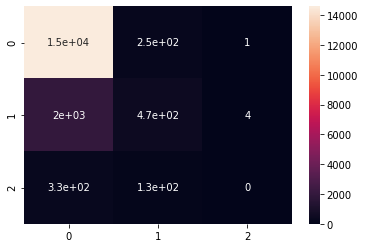

In [ ]:
pred_cv=model.predict(X_cv)
print(pred_cv)
cm=confusion_matrix(y_cv,pred_cv)
sns.heatmap(cm,annot=True)
print("Validation Accuracy : ", accuracy_score(y_cv,pred_cv))
print(cm)
pred_test=model.predict(test)


In [ ]:
#Fitting the model
#------- --- -----
import xgboost as xgb
X_train,X_cv,y_train,y_cv=train_test_split(X,y,test_size=0.25,random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dcv = xgb.DMatrix(X_cv, label=y_cv)
param={
    'max_depth' : 6,
    'objective' : 'multi:softprob',
    'num_class' : 3,
    'random_state' : 1,
    'max_depth' : 6,
    'n_estimators' : 151
}
num_round = 20 
model=xgb.train(param,dtrain,num_round)
print(dtrain)

In [ ]:
#Predicting the CV
from sklearn.metrics import confusion_matrix
dtest=xgb.DMatrix(test)
pred_prob_cv=model.predict(dcv)
print(pred_prob_cv.shape)
pred_cv = np.asarray([np.argmax(line) for line in pred_prob_cv])
cm=confusion_matrix(y_cv,pred_cv)
print(cm)
sns.heatmap(cm,annot=True)

print("Validation Accuracy : ", accuracy_score(y_cv,pred_cv))

pred_prob_test=model.predict(dtest)
pred_test = np.asarray([np.argmax(line) for line in pred_prob_test])

print(pred_prob_test)
print(pred_test)
#for i in pred_cv:
#  print(pred_cv[i])

TypeError: ignored

In [ ]:
#LightGBM
from lightgbm import LGBMClassifier
X_train,X_cv,y_train,y_cv=train_test_split(X,y,test_size=0.25,random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dcv = xgb.DMatrix(X_cv, label=y_cv)
model=LGBMClassifier(random_state=1,max_depth=6,n_estimators=151,objective='multi:softprob',num_class=3,learning_rate=0.03)
mode

TypeError: ignored

In [ ]:
pred_cv=model.predict_proba(X_cv)[:,1]
print(pred_cv.shape)

(22215,)


Creating Model......
Validation Accuracy :  0.8276156049652162

Prediction in Test Data Done successfully


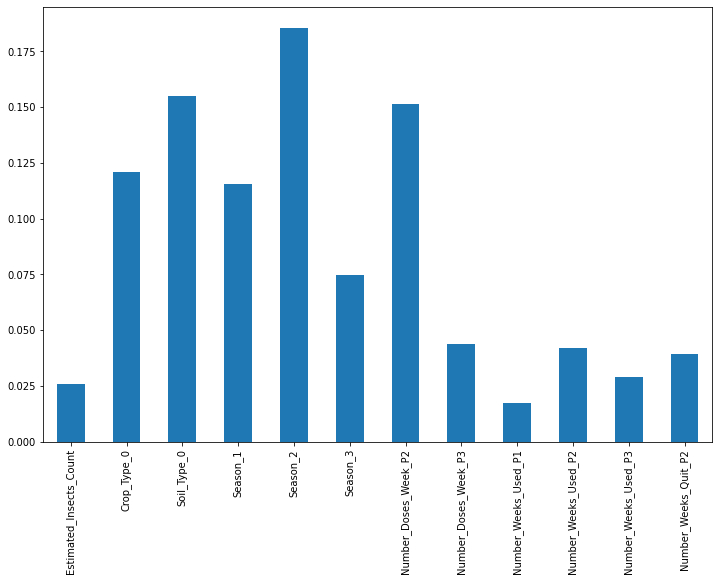

In [230]:
#XGB RepeatedStratifiedKFold SMOTE
#--- ----------------------- -----
from imblearn.over_sampling import SMOTE
from sklearn.utils import class_weight

#class_weight=class_weight.compute_class_weight('balanced',np.unique(y_sm),y_sm) 
X_train,X_cv,y_train,y_cv = train_test_split(X,y,test_size=0.33)
smote=SMOTE('minority')
X_sm,y_sm=smote.fit_sample(X_train,y_train)

print("Creating Model......")
#model=XGBClassifier(random_state=1,max_depth=6,n_estimators=151,objective='multi:softmax',num_class=3,class_weight=class_weight)
model=XGBClassifier(random_state=1,max_depth=6,n_estimators=151,objective='multi:softmax',num_class=3)
model.fit(X_sm,y_sm)

pred_cv=model.predict(np.array(X_cv))
print("Validation Accuracy : ", accuracy_score(y_cv,pred_cv))
print()

#Prediction in Test Dataset
#---------- -- ---- ------- 
pred_test=model.predict(np.array(test))
print("Prediction in Test Data Done successfully")

#Importance of the variables
#---------- -- --- ---------
feature_importances=pd.Series(model.feature_importances_,index=X.columns)
feature_importances.plot.bar(figsize=(12,8))

In [234]:
#XGB RepeatedStratifiedKFold SMOTE
#--- ----------------------- -----
from imblearn.over_sampling import SMOTE
from sklearn.utils import class_weight

class_weight=class_weight.compute_class_weight('balanced',np.unique(y),y) 
smote=SMOTE('minority')
X_sm,y_sm=smote.fit_sample(X,y)

i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
print("Creating Model......")
for train_index,cv_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    X_train,X_cv = X.loc[train_index],X.loc[cv_index]
    y_train,y_cv = y[train_index],y[cv_index]  
    model=XGBClassifier(random_state=1,max_depth=6,n_estimators=151,objective='multi:softmax',num_class=3,class_weight=class_weight)
    #model=XGBClassifier(random_state=1,max_depth=6,n_estimators=151,objective='multi:softmax',num_class=3)
    model.fit(X_train,y_train)
    pred_cv=model.predict(X_cv)
    print("Validation Accuracy : ", accuracy_score(y_cv,pred_cv))
    print()
    i+=1

#Prediction in Test Dataset
#---------- -- ---- ------- 
#pred_test=model.predict(np.array(test))
pred_test=model.predict(test)
print("Prediction in Test Data Done successfully")

#Importance of the variables
#---------- -- --- ---------
#feature_importances=pd.Series(model.feature_importances_,index=X.columns)
#feature_importances.plot.bar(figsize=(12,8))

Creating Model......

1 of kfold 5
Validation Accuracy :  0.8468939905469277


2 of kfold 5
Validation Accuracy :  0.846612649110961


3 of kfold 5
Validation Accuracy :  0.8472878685572811


4 of kfold 5
Validation Accuracy :  0.8453097743514715


5 of kfold 5
Validation Accuracy :  0.8487986044679534

Prediction in Test Data Done successfully


In [231]:
#Prediction in Test Dataset
#---------- -- ---- ------- 
sample=np.array(test)
print(sample.shape)
#print(test.columns)

#Importance of the variables
#---------- -- --- ---------
#feature_importances=pd.Series(model.feature_importances_,index=X.columns)
#feature_importances.plot.bar(figsize=(12,8))

(59310, 12)


In [235]:
#Storing the results
#------- --- -------
submission=pd.read_csv('sample_submission_O1oDc4H.csv')
submission['Crop_Damage']=pred_test
submission['ID']=test_orig['ID']
timestamp=(re.findall('[0-9]+',str(time.time())))[0]
filename='submission_'+str(timestamp)+'.csv'

pd.DataFrame(submission,columns=['ID','Crop_Damage']).to_csv(filename,index=False)
print("File named {} stored successfully".format(filename))

File named submission_1595785848.csv stored successfully


0.4.3
